# Importing the data and libraries

In [ ]:
import os
import json
import gzip
import pandas as pd
from urllib.request import urlopen
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import plotly.express as px
import matplotlib.pyplot as plt
from collections import Counter
from collections import Counter
from wordcloud import WordCloud
from matplotlib import rcParams
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
!wget --no-check-certificate https://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/Software_5.json.gz

--2023-05-04 18:34:10--  https://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/Software_5.json.gz
Resolving jmcauley.ucsd.edu (jmcauley.ucsd.edu)... 137.110.160.73
Connecting to jmcauley.ucsd.edu (jmcauley.ucsd.edu)|137.110.160.73|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 5339013 (5.1M) [application/x-gzip]
Saving to: ‘Software_5.json.gz.1’

Software_5.json.gz. 100%[===================>]   5.09M  8.57MB/s    in 0.6s    

2023-05-04 18:34:11 (8.57 MB/s) - ‘Software_5.json.gz.1’ saved [5339013/5339013]



**Data Exploration**

In [ ]:
# loading the data

df = []
with gzip.open('Software_5.json.gz') as f:
    for l in f:
        df.append(json.loads(l.strip()))

# total length of list, this number equals total number of products
print(len(df))

# first row of the list
print(df[0])

12805
{'overall': 4.0, 'verified': False, 'reviewTime': '10 20, 2010', 'reviewerID': 'A38NELQT98S4H8', 'asin': '0321719816', 'style': {'Format:': ' DVD-ROM'}, 'reviewerName': 'WB Halper', 'reviewText': "I've been using Dreamweaver (and it's predecessor Macromedia's UltraDev) for many years.  For someone who is an experienced web designer, this course is a high-level review of the CS5 version of Dreamweaver, but it doesn't go into a great enough level of detail to find it very useful.\n\nOn the other hand, this is a great tool for someone who is a relative novice at web design.  It starts off with a basic overview of HTML and continues through the concepts necessary to build a modern web site.  Someone who goes through this course should exit with enough knowledge to create something that does what you want it do do...within reason.  Don't expect to go off and build an entire e-commerce system with only this class under your belt.\n\nIt's important to note that there's a long gap from s

# Data Exploration

In [ ]:
df = pd.DataFrame(df)
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4.0,False,"10 20, 2010",A38NELQT98S4H8,0321719816,{'Format:': ' DVD-ROM'},WB Halper,I've been using Dreamweaver (and it's predeces...,A solid overview of Dreamweaver CS5,1287532800,NaN,NaN
1,4.0,False,"10 18, 2010",A3QJU4FEN8PQSZ,0321719816,{'Format:': ' DVD-ROM'},Grimmy,"The demo is done with the PC version, with ref...",A good value,1287360000,NaN,NaN
2,5.0,False,"10 16, 2010",ACJT8MUC0LRF0,0321719816,{'Format:': ' DVD-ROM'},D. Fowler,If you've been wanting to learn how to create ...,This is excellent software for those who want ...,1287187200,3,NaN
3,5.0,False,"10 12, 2010",AYUF7YETYOLNX,0321719816,{'Format:': ' DVD-ROM'},Bryan Newman,I've been creating websites with Dreamweaver f...,A Fantastic Overview of Dream Weaver and Web D...,1286841600,NaN,NaN
4,5.0,False,"10 7, 2010",A31ICLWQ9CSHRS,0321719816,{'Format:': ' DVD-ROM'},Al Swanson,I decided (after trying a number of other prod...,Excellent Tutorials!,1286409600,NaN,NaN


In [ ]:


def analyze_df(df):
    # Print dataset shape
    print("Dataset shape:", df.shape)
    print("\n")

    # Print column information
    print("Column information:")
    print(df.info())
    print("\n")

    # Display basic descriptive statistics for numerical features
    print("Descriptive statistics for numerical features:")
    print(df.describe())
    print("\n")

    # Check for null values
    print("Null values in the dataset:")
    print(df.isnull().sum())
    print("\n")



# Analyze the dataset
analyze_df(df)


Dataset shape: (12805, 12)


Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12805 entries, 0 to 12804
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         12805 non-null  float64
 1   verified        12805 non-null  bool   
 2   reviewTime      12805 non-null  object 
 3   reviewerID      12805 non-null  object 
 4   asin            12805 non-null  object 
 5   style           7161 non-null   object 
 6   reviewerName    12796 non-null  object 
 7   reviewText      12804 non-null  object 
 8   summary         12799 non-null  object 
 9   unixReviewTime  12805 non-null  int64  
 10  vote            3902 non-null   object 
 11  image           71 non-null     object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 1.1+ MB
None


Descriptive statistics for numerical features:
            overall  unixReviewTime
count  12805.000000    1.280500e+04
mean       3.87

In [ ]:
#df = df.sample(10000, random_state = 42)

In [ ]:
# Count of each rating

df['overall'].value_counts()

5.0    5972
4.0    3016
3.0    1598
1.0    1500
2.0     719
Name: overall, dtype: int64

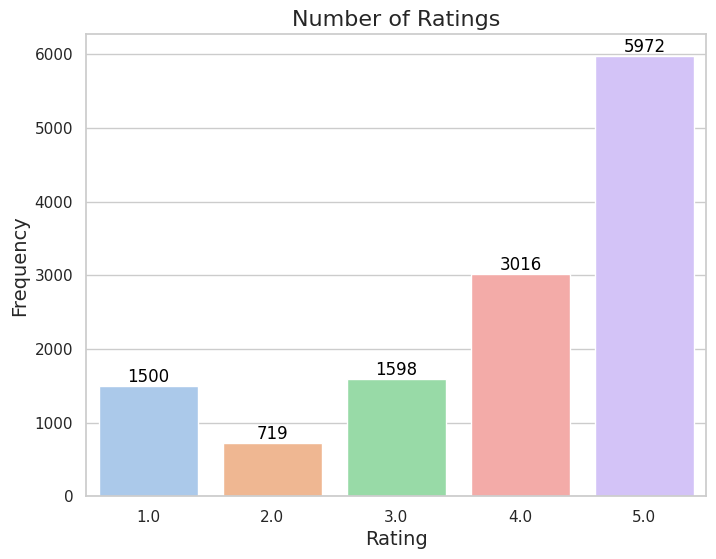

In [ ]:
# Count the number of reviews for each rating
rating_counts = df['overall'].value_counts().sort_index()

# Create a bar plot of rating frequencies
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='pastel')

# Add frequency tags on each bar
for i, count in enumerate(rating_counts.values):
    ax.text(i, count, str(count), color='black', ha='center', va='bottom', fontsize=12)

# Set plot labels and title
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Number of Ratings', fontsize=16)

# Show the plot
plt.show()


In [ ]:
# Load the product dataset
products_df = pd.read_csv("product_names.csv")

# Drop duplicates based on the 'asin' column
products_df.drop_duplicates(subset='asin', inplace=True)

# Merge the datasets using the 'asin' column with an 'inner' join
merged_df = df.merge(products_df, on='asin', how='inner')

# Group the dataset by 'reviewerName' and aggregate the 'product_name' column using the 'unique' function to get a list of unique products each user purchased
purchased_products_by_user = merged_df.groupby('reviewerName')['product_name'].unique().reset_index()

# Count the number of products each user purchased
purchased_products_by_user['product_count'] = purchased_products_by_user['product_name'].apply(lambda x: len(x))

# Sort the results by the number of purchased products in descending order
purchased_products_by_user = purchased_products_by_user.sort_values('product_count', ascending=False)

# Select the top 10 most active reviewers based on the number of purchased products
top_reviewers = purchased_products_by_user.head(10)

# Print the user ID and the list of purchased products for the selected reviewers
for i, row in top_reviewers.iterrows():
    print(f"User ID: {row['reviewerName']}")
    print(f"Purchased Products: {', '.join(row['product_name'])}\n")


User ID: Amazon Customer
Purchased Products: Learn Adobe Photoshop Lightroom 3 by Video, Microsoft Office 365 Home | 1-year subscription, 5 users, PC/Mac Key Card, Quicken WillMaker Plus 2011 [Old Version], Quicken Legal Business Pro 2011 [Old Version], Key Span 4-Port USB Hub - White (UH-4WH), Microsoft Windows XP Home Edition Upgrade - Old Version, Sony VAIO 802.11a/b/g Ethernet Converter (PCWADE80), Irocks Red USB 2.0 Illuminated 4PORT Hub, Dragon NaturallySpeaking 9 Preferred [OLD VERSION], Microsoft Windows Vista Ultimate UPGRADE DVD (OLD VERSION), McAfee Internet Security Suite 2008 - 3 User [OLD VERSION], Nero 8 Ultra Edition [OLD VERSION], Acronis True Image 11 Home [OLD VERSION], Iogear POWERLINE/HOMEPLUG WALL MOUNT (GHPU21), TurboTax Deluxe Federal 2007 [OLD VERSION], TurboTax Deluxe Federal + State 2007 [OLD VERSION], Microsoft Office 2008 for Mac Special Media Edition [Old Version], System Mechanic - Up to 3 PCs, Mavis Beacon Teaches Typing Platinum 20 - Old Version, Norton

In [ ]:
# Filter the dataset to include only purchases made by Lincoln
jerry_purchases = df[df['reviewerName'] == 'Lincoln']

# Merge the 'jerry_purchases' dataframe with the 'products_df' dataframe to add product names
jerry_purchases = jerry_purchases.merge(products_df[['asin', 'product_name']], on='asin')

# Group the purchases by product name and purchase date, and count the number of purchases for each combination
purchases_by_product = jerry_purchases.groupby(['product_name', 'reviewTime']).agg({'asin': 'count'}).reset_index()

# Rename the columns
purchases_by_product.columns = ['product_name', 'purchase_date', 'purchase_count']

# Sort the purchases by date
purchases_by_product = purchases_by_product.sort_values('purchase_date')

# Print the results
print(f"Lincoln's Purchases:\n")
for i, row in purchases_by_product.iterrows():
    print(f"Product Name: {row['product_name']}")
    print(f"Purchase Date: {row['purchase_date']}")
    print(f"Purchase Count: {row['purchase_count']}\n")


Lincoln's Purchases:

Product Name: Cyberlink PowerDirector 12 Ultimate
Purchase Date: 01 5, 2014
Purchase Count: 1

Product Name: Poser 9
Purchase Date: 01 6, 2012
Purchase Count: 1

Product Name: Quicken Legal Business Pro 2014
Purchase Date: 02 27, 2014
Purchase Count: 1

Product Name: Pinnacle Studio 17 Plus [Old Version]
Purchase Date: 02 27, 2014
Purchase Count: 1

Product Name: Kaspersky Internet Security 2011 3-User [Old Version]
Purchase Date: 03 17, 2011
Purchase Count: 1

Product Name: CorelDRAW Premium Suite X5 [OLD VERSION]
Purchase Date: 03 17, 2011
Purchase Count: 1

Product Name: Norton 360 Multi-Device 2013 - 1 User / 5 Devices (Old Version)
Purchase Date: 04 24, 2013
Purchase Count: 1

Product Name: Corel VideoStudio Pro X7 [Old Version]
Purchase Date: 05 15, 2014
Purchase Count: 1

Product Name: Corel VideoStudio Ultimate X7 [Old Version]
Purchase Date: 05 15, 2014
Purchase Count: 1

Product Name: McAfee Antivirus Plus 2012 - 3 Users [Old Version]
Purchase Date: 05 1

In [ ]:
# Load the product dataset
products_df = pd.read_csv("product_names.csv")

# Drop duplicates based on the 'asin' column
products_df.drop_duplicates(subset='asin', inplace=True)

# Merge the datasets using the 'asin' column with an 'inner' join
merged_df = df.merge(products_df, on='asin', how='inner')

# Group the reviews by product, count the number of reviews, and calculate the average rating
reviews_by_product = merged_df.groupby(['asin', 'product_name']).agg({'reviewText': 'count', 'overall': 'mean'}).reset_index()

# Rename the columns
reviews_by_product.columns = ['asin', 'product_name', 'review_count', 'average_rating']

# Round the average rating to 2 decimal places
reviews_by_product['average_rating'] = reviews_by_product['average_rating'].round(2)

# Sort the results by the number of reviews in descending order
reviews_by_product = reviews_by_product.sort_values('review_count', ascending=False)

print("Number of reviews and average rating per product:")
reviews_by_product.head(5)




Number of reviews and average rating per product:


,asin,product_name,review_count,average_rating
42,B0000AZJY6,Iogear POWERLINE/HOMEPLUG WALL MOUNT (GHPU21),452,4.93
83,B000EORV8Q,Irocks Red USB 2.0 Illuminated 4PORT Hub,232,4.93
51,B0001FS9NE,Sony VAIO 802.11a/b/g Ethernet Converter (PCWA...,230,4.93
18,B000050ZRE,Key Span 4-Port USB Hub - White (UH-4WH),230,4.93
562,B00EZPXYP4,NORTON 360 21.0 EN 1U 3LIC MM,98,4.41


In [ ]:
merged_df['product_name'].value_counts()

Iogear POWERLINE/HOMEPLUG WALL MOUNT (GHPU21)                           452
Irocks Red USB 2.0 Illuminated 4PORT Hub                                232
Key Span 4-Port USB Hub - White (UH-4WH)                                230
Sony VAIO 802.11a/b/g Ethernet Converter (PCWADE80)                     230
TurboTax Deluxe Fed + Efile + State 2013 OLD VERSION                    110
                                                                       ... 
Totally Mad                                                               1
Topo USA 7.0 National Edition [Old Version]                               1
Microsoft Visual Studio 2008 Standard (Old Version)                       1
PowerDirector 6 Boxed                                                     1
Tell Me More Spanish Performance Version 9 (10 Levels) [OLD VERSION]      1
Name: product_name, Length: 791, dtype: int64

In [ ]:
merged_df.shape

(12805, 13)

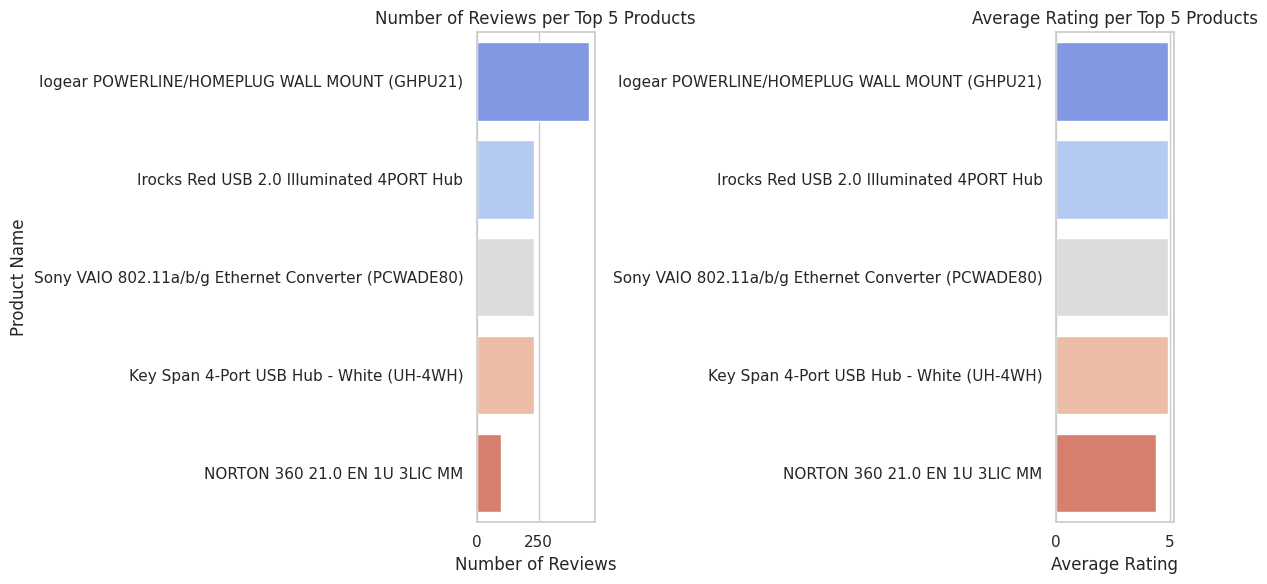

In [ ]:

# Get the top 5 products
top5_products = reviews_by_product.head(5)

# Set the style and size of the chart
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create a bar chart for the number of reviews
plt.subplot(1, 2, 1)
sns.barplot(x='review_count', y='product_name', data=top5_products, palette='coolwarm')
plt.title('Number of Reviews per Top 5 Products')
plt.xlabel('Number of Reviews')
plt.ylabel('Product Name')

# Create a bar chart for the average rating
plt.subplot(1, 2, 2)
sns.barplot(x='average_rating', y='product_name', data=top5_products, palette='coolwarm')
plt.title('Average Rating per Top 5 Products')
plt.xlabel('Average Rating')
plt.ylabel('')

# Display the chart
plt.tight_layout()
plt.show()


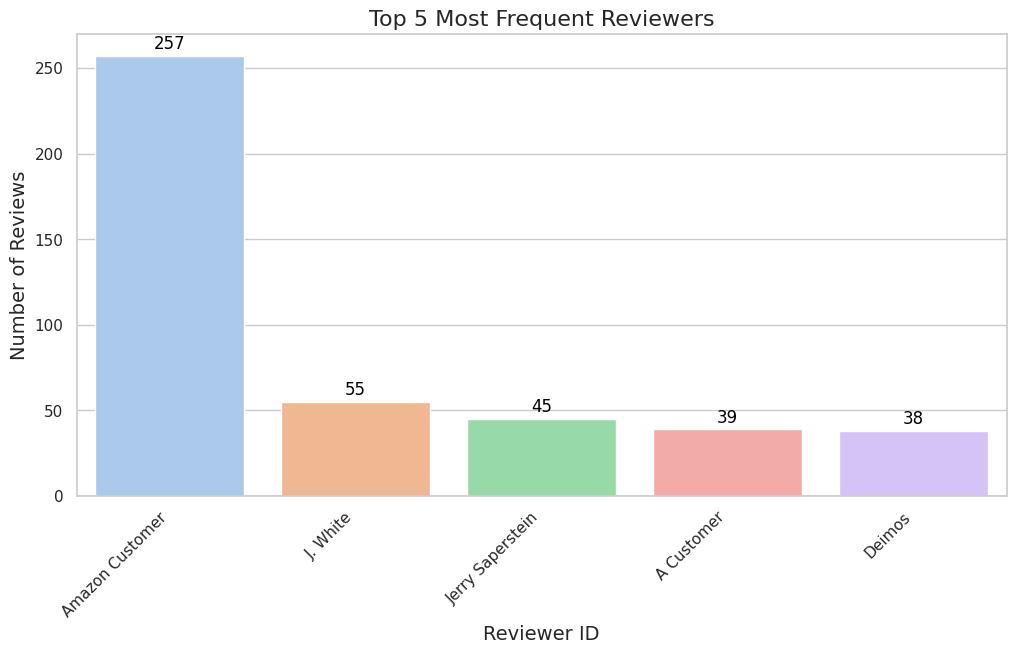

In [ ]:

# Analyze the top 10 most frequent reviewers
top_reviewers = df['reviewerName'].value_counts().head(5)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_reviewers.index, y=top_reviewers.values, palette='pastel')
plt.xlabel('Reviewer ID', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.title('Top 5 Most Frequent Reviewers', fontsize=16)
plt.xticks(rotation=45, ha='right')

# Add annotations for the number of reviews on each bar
for i, p in enumerate(ax.patches):
    ax.annotate(f"{top_reviewers.values[i]}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

plt.show()

Time series

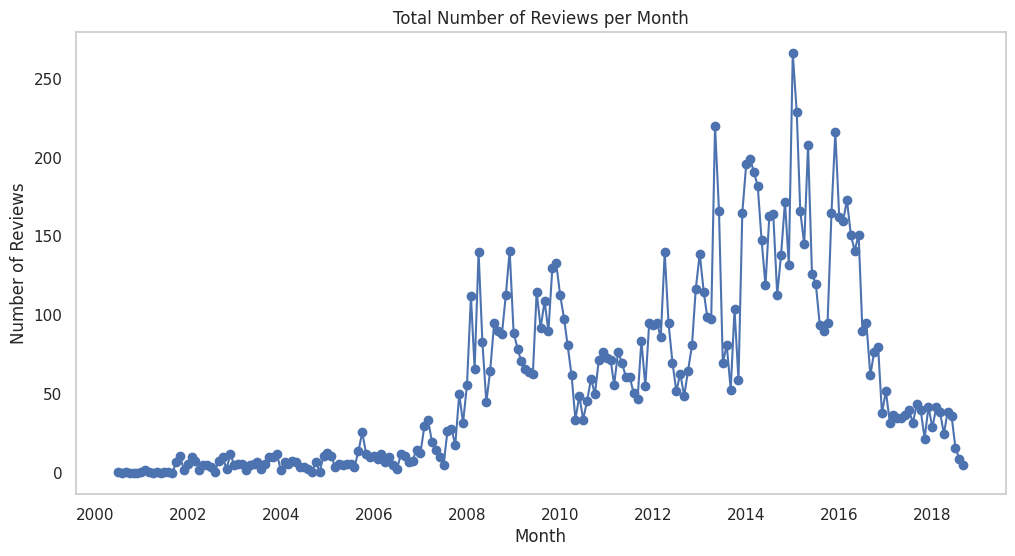

In [ ]:
df['reviewTime'] = pd.to_datetime(df['reviewTime'], format='%m %d, %Y')
df.set_index('reviewTime', inplace=True)
monthly_reviews = df.resample('M').size().reset_index(name='review_count')

plt.figure(figsize=(12, 6))
plt.plot(monthly_reviews['reviewTime'], monthly_reviews['review_count'], marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.title('Total Number of Reviews per Month')
plt.grid()
plt.show()


In [ ]:
pip install plotly


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly.express as px

fig = px.line(monthly_reviews, x='reviewTime', y='review_count', title='Total Number of Reviews per Month')

# Customize the appearance of the plot
fig.update_traces(marker=dict(size=8, line=dict(width=2)), line=dict(color='blue'))
fig.update_layout(hovermode='x')

# Set axis labels
fig.update_xaxes(title_text='Month')
fig.update_yaxes(title_text='Number of Reviews')

fig.show()



In [ ]:
# Calculate the number of unique products
num_products = df['asin'].nunique()

# Calculate the number of unique users
num_users = df['reviewerID'].nunique()

print(f"Number of unique products: {num_products}")
print(f"Number of unique users: {num_users}")


Number of unique products: 802
Number of unique users: 1826


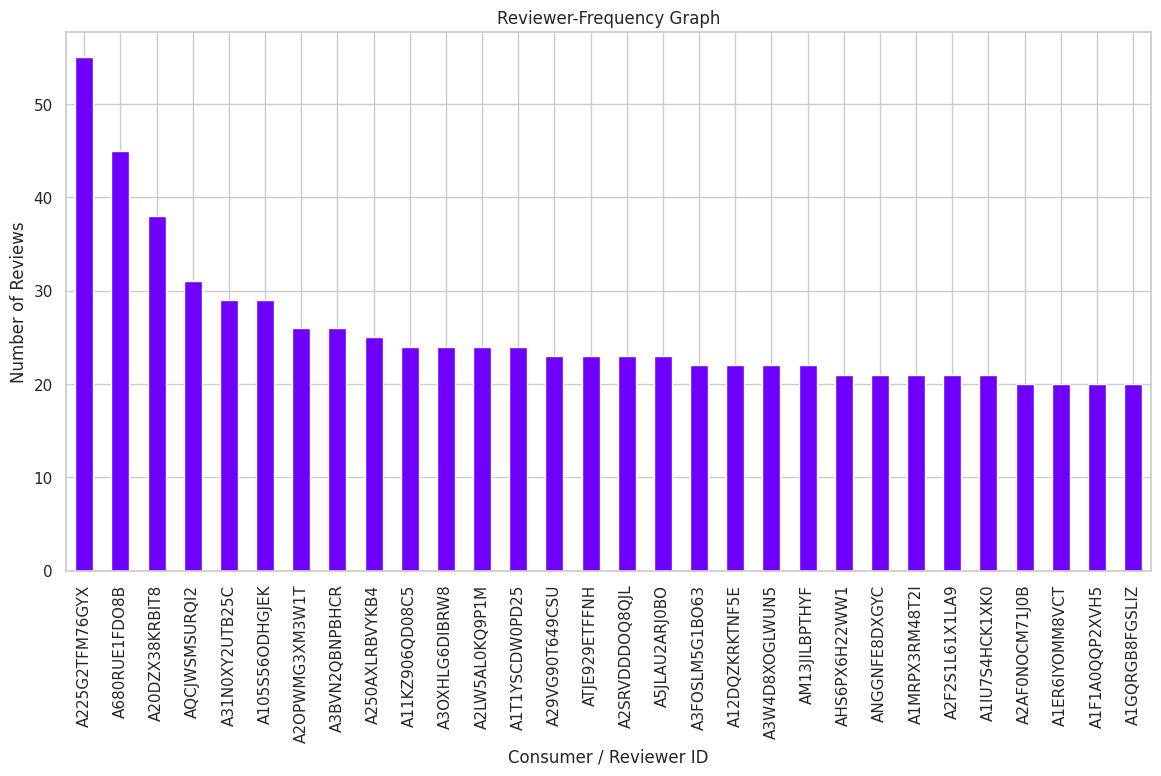

In [ ]:
def most_frequent_users_graph(df, log=False):
    df['reviewerID'].value_counts().nlargest(30).plot(kind='bar', log=log, figsize=(14,7), grid=True, color="#6f00ff")
    plt.title("Reviewer-Frequency Graph")
    plt.xlabel("Consumer / Reviewer ID")
    plt.ylabel("Number of Reviews")
    plt.show()

most_frequent_users_graph(df)

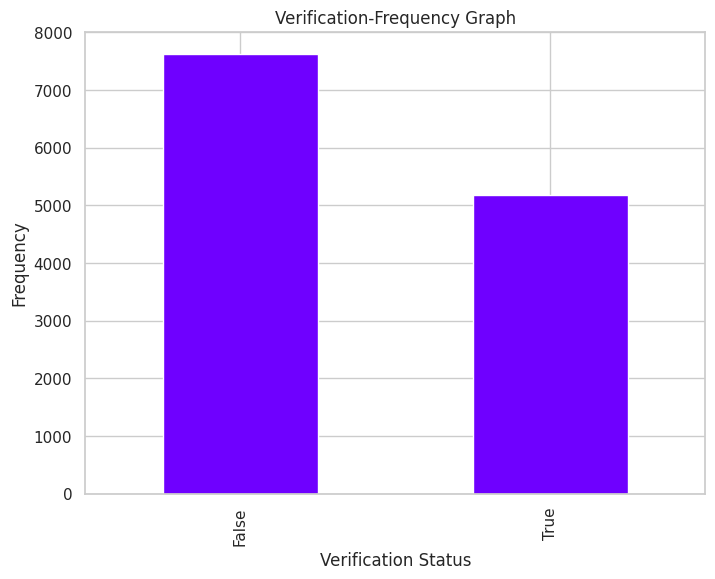

In [ ]:
def verified_reviews_graph(df, log=False):
    df.verified.value_counts().plot(kind='bar', log=log, figsize=(8,6), grid=True, color="#6f00ff")
    plt.title("Verification-Frequency Graph")
    plt.xlabel("Verification Status")
    plt.ylabel("Frequency")
    plt.show()

verified_reviews_graph(df, log=False)

In [ ]:
# Group the reviews by reviewer, count the number of reviews, and calculate the average rating and range of ratings
reviews_by_reviewer = df.groupby(['reviewerID', 'reviewerName']).agg({'reviewText': 'count', 'overall': ['min', 'max', 'mean']}).reset_index()

# Flatten the multi-level column names
reviews_by_reviewer.columns = [' '.join(col).strip() for col in reviews_by_reviewer.columns.values]

# Rename the columns
reviews_by_reviewer = reviews_by_reviewer.rename(columns={'reviewerID ': 'reviewerID', 'reviewerName ': 'reviewerName', 'reviewText count': 'num_reviews', 'overall min': 'min_rating', 'overall max': 'max_rating', 'overall mean': 'avg_rating'})

# Sort the results by the number of reviews in descending order
reviews_by_reviewer = reviews_by_reviewer.sort_values('num_reviews', ascending=False)

# Show the top 10 reviewers by number of reviews
print("Top 10 Reviewers by Number of Reviews:")
reviews_by_reviewer[[ 'reviewerName', 'num_reviews', 'min_rating', 'max_rating', 'avg_rating']].head(10)


Top 10 Reviewers by Number of Reviews:


,reviewerName,num_reviews,min_rating,max_rating,avg_rating
518,J. White,55,1.0,5.0,4.072727
1426,Jerry Saperstein,45,1.0,5.0,3.488889
495,Deimos,38,1.0,5.0,2.710526
1707,A Customer,31,1.0,5.0,3.548387
1,Peace Daddy,29,1.0,5.0,3.689655
983,Stephanie Sullivan,29,2.0,5.0,4.206897
1114,Lincoln,26,1.0,5.0,4.461538
564,ConsumerAdvocate (dakotad555) at (gmail) dot (...,25,1.0,5.0,2.720000
814,Tammi,25,1.0,5.0,1.560000
23,Bill McLean,24,1.0,5.0,3.458333


In [ ]:
min_max_rating_perproduct = df.groupby('asin')['overall'].aggregate(['min','max'])
min_max_rating_perproduct.sample(10)

,min,max
asin,,
B00A6TPHZS,1.0,5.0
B00FYH912C,4.0,5.0
B009716H00,3.0,5.0
B003YJ5ESM,1.0,5.0
B001AMHWP8,1.0,5.0
B00PG8FSYE,2.0,5.0
B00LHTRE1G,1.0,5.0
B00E6OPDUS,1.0,5.0
B0009X6QJM,3.0,5.0


In [ ]:
def avg_rating(df):

    grouped_df = df.groupby(['asin'])['overall'].agg(['count','mean']).reset_index()
    return grouped_df.round({'mean':1})


In [ ]:

def product_most_sold(df, log=False):
    df = avg_rating(df).nlargest(30, 'count')

    fig = px.bar(df, y='count', x='asin', text='mean', log_y=log)
    fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
    fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',
                      autosize=False,
                      width=900, height=600,
                      margin=dict(l=20, r=50, t=50, b=20),
                      title='Product Frequency with Average Rating',
                      xaxis_title="Product",
                      yaxis_title="Frequency")
    fig.show()
product_most_sold(df, log=False)

In [ ]:
def product_least_sold(df, log=False):
    df = avg_rating(df).nsmallest(30, 'count')

    fig = px.bar(df, y='count', x='asin', text='mean', log_y=log)
    fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
    fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',
                      autosize=False,
                      width=900, height=600,
                      margin=dict(l=20, r=50, t=50, b=20),
                      title='Product Frequency with Average Rating',
                      xaxis_title="Product",
                      yaxis_title="Frequency")
    fig.show()

product_least_sold(df, log=False)

# Data Preprocessing

Labeling in 3 categories

In [ ]:
def label_data(rating):
    if rating in [4, 5]:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif rating in [1, 2]:
        return "Negative"

# Apply the function to the "rating" column
df["rating_of_the_product"] = df["overall"].apply(label_data)


In [ ]:
df["rating_of_the_product"].value_counts()

Positive    8988
Negative    2219
Neutral     1598
Name: rating_of_the_product, dtype: int64

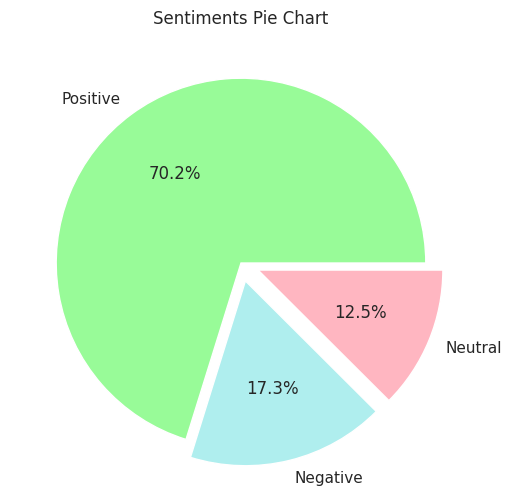

In [ ]:
colors= ['palegreen','paleturquoise','lightpink']
ax = (df['rating_of_the_product']).value_counts().plot(kind='pie', title='Sentiments Pie Chart', colors = colors,autopct='%1.1f%%',  explode=(0,0.1,0.1),figsize=(11, 6))
ax.yaxis.set_visible(False)

Dropping useless columns

with respect to Null values, we know that 3 columns of Image,Style and vote should be dropped.

In [ ]:
df.isnull().sum()

overall                      0
verified                     0
reviewerID                   0
asin                         0
style                     5644
reviewerName                 9
reviewText                   1
summary                      6
unixReviewTime               0
vote                      8903
image                    12734
rating_of_the_product        0
dtype: int64

Also, we can drop reviewer name as we already have the ID for them and unixReviewTime column as this does not add much value

### Dropping useless columns

In [ ]:
df = df.drop(['unixReviewTime','style','image','vote','verified'], axis = 1)

In [ ]:
# assuming df is your DataFrame with date and time as index
df = df.reset_index()
df = df.drop('reviewTime', axis=1)

*italicized text*### Cleaning the text

In [ ]:
import re

def remove_spl_chars(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r"[^a-zA-Z]", " ", text)
    text = re.sub('\s+', ' ', text)
    text = text.lower()
    return text

df['clean_text'] = df['reviewText'].apply(lambda x: remove_spl_chars(x))
df['clean_summary'] = df['summary'].apply(lambda x: remove_spl_chars(x))



In [ ]:
import string

def remove_punctuations(text):
    if not isinstance(text, str):
        return ""
    punctuations = string.punctuation
    return text.translate(str.maketrans('', '', punctuations))

df['clean_text'] = df['clean_text'].apply(lambda x: remove_punctuations(x))
df['clean_summary'] = df['summary'].apply(lambda x: remove_punctuations(x))


### Dealing with Stopwords

In [ ]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

negative_words = ["no", "not", "don't", "shouldn't", "couldn't", "wasn't", "weren't", "isn't", "aren't", "doesn't", "didn't", "haven't", "hasn't", "hadn't"]

def remove_stopwords(text):
    if not isinstance(text, str):
        return ""
    word_tokens = word_tokenize(text)
    filtered_sentence = []
    for w in word_tokens:
        if w in negative_words:
            filtered_sentence.append(w)
        elif w not in stop_words:
            filtered_sentence.append(w)
    return ' '.join(filtered_sentence)

df['clean_text']  = df['clean_text'].apply(lambda x: remove_stopwords(x))
df['clean_summary'] = df['clean_summary'].apply(lambda x: remove_stopwords(x))




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now']


In [ ]:
df['length'] = df['clean_text'].str.split(" ").apply(len)
df['length']

0        104
1        232
2        781
3        217
4        101
        ... 
12800    109
12801     62
12802    102
12803     55
12804     48
Name: length, Length: 12805, dtype: int64

In [ ]:
fig = px.histogram(df, x='length', template='plotly_white', title='Comments counts by length')
fig.update_xaxes(categoryorder='total descending', title='Number of words').update_yaxes(title='Number of rows')
fig.show()

<Axes: >

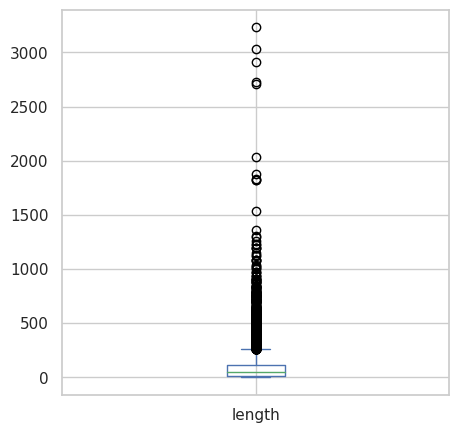

In [ ]:
plt.figure(figsize=(5,5))
df['length'].plot(kind = 'box')

In [ ]:
length = df['length'].sort_values(ascending = True)

In [ ]:
# Avg length of reviews
length.mean()

91.53479109722764

In [ ]:
length

12060       1
11537       1
6771        1
9107        1
2417        1
         ... 
12227    2707
5988     2723
6816     2916
6832     3031
6030     3232
Name: length, Length: 12805, dtype: int64

In [ ]:
less_than_3_words = ['yes' if i < 3 else 'No'for i in length]
df['clean_text'].groupby(less_than_3_words).count()

No     12010
yes      795
Name: clean_text, dtype: int64

In [ ]:
more_than_200_words = ['yes' if i >  200 else 'No'for i in length]
df.groupby(more_than_200_words).count()

,overall,reviewerID,asin,reviewerName,reviewText,summary,rating_of_the_product,clean_text,clean_summary,length
No,11352,11352,11352,11343,11351,11346,11352,11352,11352,11352
yes,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453


In [ ]:
df = df[df['length']<90]
df = df[df['length']>2]
df.shape

(7899, 10)

<Axes: >

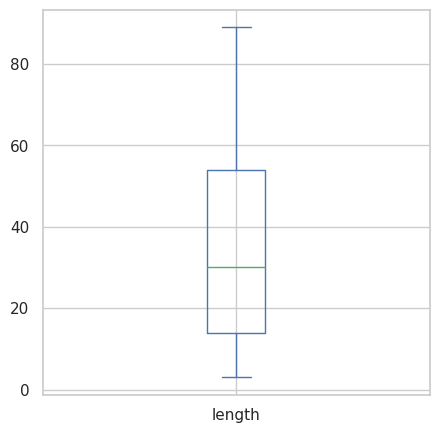

In [ ]:
plt.figure(figsize=(5,5))
df['length'].plot(kind = 'box')

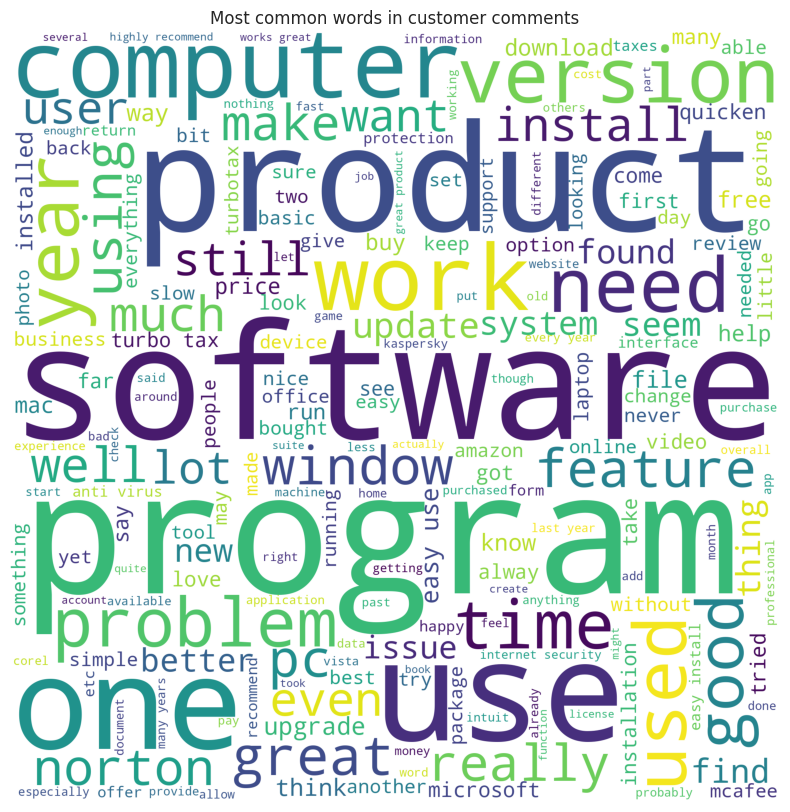

In [ ]:
wordcloud = WordCloud(height=2000, width=2000, background_color='white')
wordcloud = wordcloud.generate(' '.join(df['clean_text'].tolist()))

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.title("Most common words in customer comments")
plt.axis('off')
plt.show()


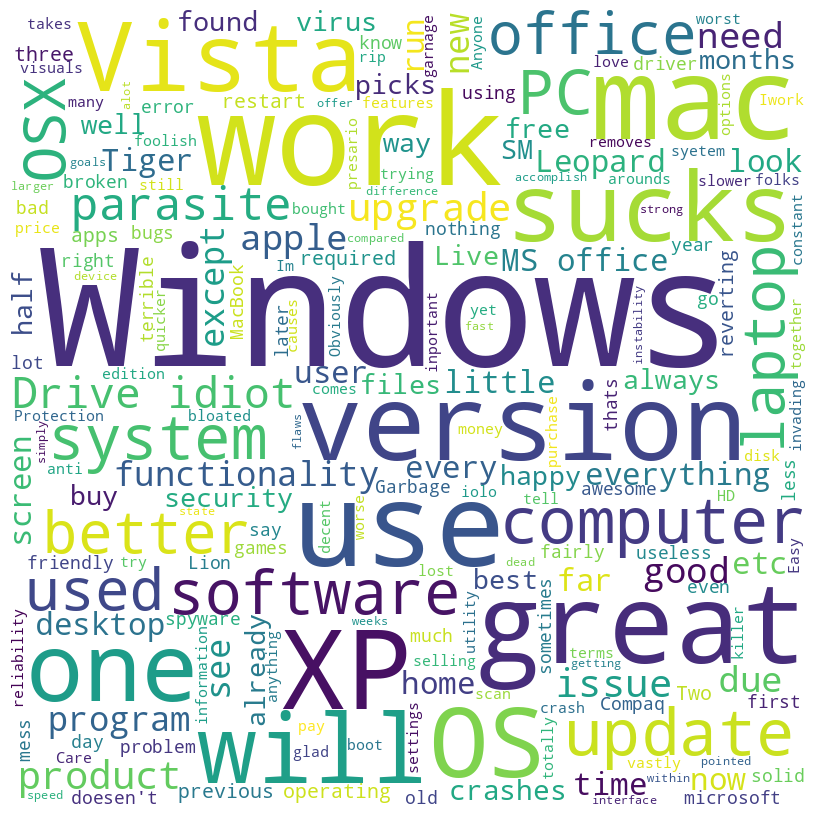

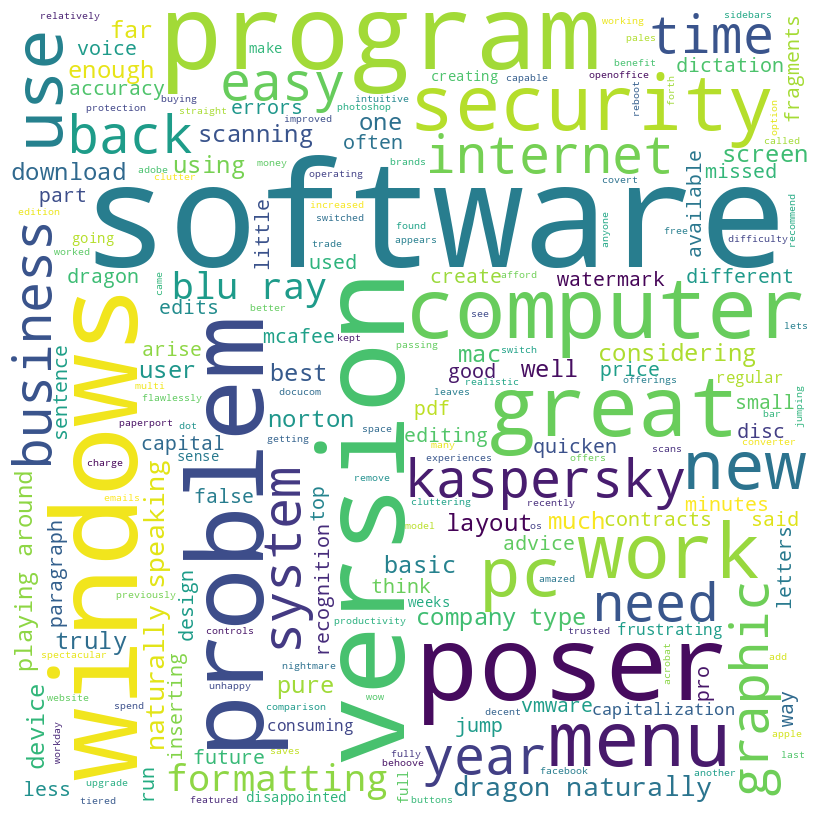

In [ ]:

# Filter the rows for customers named "Deimos"
deimos_reviews = df.loc[df['reviewerName'] == 'Deimos', 'reviewText']

# Combine all the reviews into one string
deimos_text = ' '.join(deimos_reviews)

# Generate the word cloud for "Deimos"
wordcloud_deimos = WordCloud(width=800, height=800, background_color='white').generate(deimos_text)

# Plot the word cloud for "Deimos"
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_deimos)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Filter the rows for customers named "Lincoln"
lincoln_reviews = df.loc[df['reviewerName'] == 'Lincoln', 'clean_text']

# Combine all the reviews into one string
lincoln_text = ' '.join(lincoln_reviews)

# Generate the word cloud for "Lincoln"
wordcloud_lincoln = WordCloud(width=800, height=800, background_color='white').generate(lincoln_text)

# Plot the word cloud for "Lincoln"
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_lincoln)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [ ]:
from nltk.util import ngrams
stop_words = set(stopwords.words('english'))

# Generate list of all bi-grams in clean_text column
all_bigrams = []
for text in df["clean_text"].values:
    tokens = [word for word in text.split()]
    bigrams = ngrams(tokens, 2)
    all_bigrams += bigrams

# Count frequency of each bi-gram
bigram_counts = Counter(all_bigrams)

# Print top 20 most common bi-grams
bigram_counts.most_common(20)


[(('easy', 'use'), 520),
 (('turbo', 'tax'), 351),
 (('anti', 'virus'), 240),
 (('internet', 'security'), 239),
 (('easy', 'install'), 238),
 (('no', 'problems'), 237),
 (('h', 'r'), 204),
 (('every', 'year'), 183),
 (('many', 'years'), 175),
 (('highly', 'recommend'), 174),
 (('r', 'block'), 172),
 (('great', 'product'), 170),
 (('works', 'great'), 169),
 (('works', 'well'), 160),
 (('last', 'year'), 159),
 (('user', 'friendly'), 157),
 (('trend', 'micro'), 155),
 (('would', 'not'), 153),
 (('learning', 'curve'), 144),
 (('microsoft', 'office'), 142)]

In [ ]:
#word plot for positive reviews

# wordcloud = WordCloud(height=2000, width=2000, background_color='black')
# wordcloud = wordcloud.generate(' '.join(df.loc[df['rating_of_the_product']=='Positive','clean_text'].tolist()))

# plt.figure(figsize=(10,10))
# plt.imshow(wordcloud)
# plt.title("Most common words in positive customer comments")
# plt.axis('off')
# plt.show()

In [ ]:
#word plot for negative reviews

# from wordcloud import WordCloud
# wordcloud = WordCloud(height=2000, width=2000, background_color='black')
# wordcloud = wordcloud.generate(' '.join(df.loc[df['rating_of_the_product']=='Negative','clean_text'].tolist()))
# plt.figure(figsize=(10,10))
# plt.imshow(wordcloud)
# plt.title("Most common words in Negative customer comments")
# plt.axis('off')
# plt.show()

In [ ]:
# from wordcloud import WordCloud
# wordcloud = WordCloud(height=2000, width=2000, background_color='black')
# wordcloud = wordcloud.generate(' '.join(df.loc[df['rating_of_the_product']=='Neutral','clean_text'].tolist()))
# plt.figure(figsize=(10,10))
# plt.imshow(wordcloud)
# plt.title("Most common words in Neutral customer comments")
# plt.axis('off')
# plt.show()

In [ ]:
def getMostCommon(reviews_list,topn=20):
    reviews=" ".join(reviews_list)
    tokenised_reviews=reviews.split(" ")


    freq_counter=Counter(tokenised_reviews)
    return freq_counter.most_common(topn)


getMostCommon(df['clean_text'],topn=20)

[('not', 4094),
 ('software', 3491),
 ('use', 2729),
 ('product', 2486),
 ('program', 2087),
 ('version', 1929),
 ('one', 1800),
 ('like', 1784),
 ('easy', 1752),
 ('used', 1665),
 ('good', 1658),
 ('great', 1624),
 ('no', 1566),
 ('computer', 1556),
 ('windows', 1536),
 ('years', 1528),
 ('get', 1493),
 ('using', 1437),
 ('time', 1395),
 ('would', 1321)]

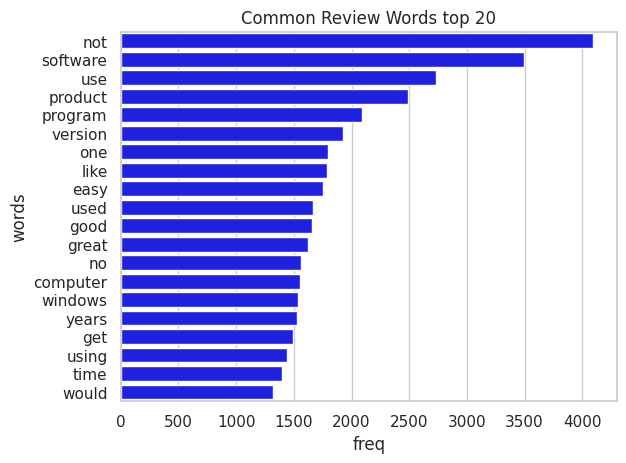

In [ ]:
def plotMostCommonWords(reviews_list,topn=20,title="Common Review Words",color="blue",axis=None): #default number of words is given as 20
    top_words=getMostCommon(reviews_list,topn=topn)
    data=pd.DataFrame()
    data['words']=[val[0] for val in top_words]
    data['freq']=[val[1] for val in top_words]
    if axis!=None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title+" top "+str(topn))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title+" top "+str(topn))

plotMostCommonWords(df['clean_text'],topn=20,title="Common Review Words",color="blue",axis=None)

In [ ]:
from nltk.util import ngrams

def getMostCommon(reviews_list, n=1, topn=20):
    reviews = " ".join(reviews_list)
    tokenised_reviews = reviews.split(" ")

    if n == 1:
        # Use unigrams
        freq_counter = Counter(tokenised_reviews)
    elif n == 2:
        # Use bigrams
        bigrams = ngrams(tokenised_reviews, n)
        freq_counter = Counter(bigrams)
    else:
        raise ValueError("n must be 1 or 2")

    return freq_counter.most_common(topn)

# Example usage to get most common bigrams in positive reviews
print('Most common bigrams in Positive Reviews')
getMostCommon(df.loc[df['rating_of_the_product']=='Positive','clean_text'], n=2, topn=20)


Most common bigrams in Positive Reviews


[(('easy', 'use'), 472),
 (('turbo', 'tax'), 242),
 (('no', 'problems'), 223),
 (('easy', 'install'), 214),
 (('internet', 'security'), 197),
 (('anti', 'virus'), 176),
 (('highly', 'recommend'), 165),
 (('works', 'great'), 160),
 (('great', 'product'), 157),
 (('h', 'r'), 151),
 (('many', 'years'), 147),
 (('works', 'well'), 143),
 (('every', 'year'), 141),
 (('r', 'block'), 126),
 (('trend', 'micro'), 125),
 (('highly', 'recommended'), 119),
 (('learning', 'curve'), 109),
 (('video', 'editing'), 108),
 (('user', 'friendly'), 105),
 (('good', 'product'), 101)]

In [ ]:
def getMostCommon(reviews_list, n=1, topn=20):
    reviews = " ".join(reviews_list)
    tokenised_reviews = reviews.split(" ")

    if n == 1:
        # Use unigrams
        freq_counter = Counter(tokenised_reviews)
    elif n == 2:
        # Use bigrams
        bigrams = ngrams(tokenised_reviews, n)
        freq_counter = Counter(bigrams)
    else:
        raise ValueError("n must be 1 or 2")

    return freq_counter.most_common(topn)

# Example usage to get most common bigrams in Negative reviews
print('Most common bigrams in Negative Reviews')
getMostCommon(df.loc[df['rating_of_the_product']=='Negative','clean_text'], n=2, topn=20)


Most common bigrams in Negative Reviews


[(('would', 'not'), 87),
 (('not', 'work'), 79),
 (('turbo', 'tax'), 67),
 (('operating', 'system'), 58),
 (('hard', 'drive'), 49),
 (('customer', 'service'), 46),
 (('could', 'not'), 45),
 (('tech', 'support'), 43),
 (('not', 'buy'), 43),
 (('last', 'year'), 37),
 (('no', 'longer'), 36),
 (('h', 'r'), 36),
 (('not', 'worth'), 32),
 (('windows', 'xp'), 32),
 (('product', 'not'), 32),
 (('version', 'not'), 32),
 (('anti', 'virus'), 31),
 (('not', 'recommend'), 31),
 (('r', 'block'), 31),
 (('not', 'install'), 30)]

In [ ]:
def getMostCommon(reviews_list, n=1, topn=20):
    reviews = " ".join(reviews_list)
    tokenised_reviews = reviews.split(" ")

    if n == 1:
        # Use unigrams
        freq_counter = Counter(tokenised_reviews)
    elif n == 2:
        # Use bigrams
        bigrams = ngrams(tokenised_reviews, n)
        freq_counter = Counter(bigrams)
    else:
        raise ValueError("n must be 1 or 2")

    return freq_counter.most_common(topn)

# Example usage to get most common bigrams in Neutral reviews
print('Most common bigrams in Neutral Reviews')
getMostCommon(df.loc[df['rating_of_the_product']=='Neutral','clean_text'], n=2, topn=20)


Most common bigrams in Neutral Reviews


[(('turbo', 'tax'), 42),
 (('user', 'friendly'), 38),
 (('easy', 'use'), 37),
 (('anti', 'virus'), 33),
 (('not', 'sure'), 24),
 (('would', 'not'), 24),
 (('microsoft', 'office'), 21),
 (('ms', 'office'), 21),
 (('last', 'year'), 21),
 (('works', 'fine'), 20),
 (('much', 'better'), 19),
 (('easy', 'install'), 19),
 (('small', 'business'), 19),
 (('not', 'much'), 18),
 (('user', 'interface'), 18),
 (('several', 'years'), 17),
 (('years', 'ago'), 17),
 (('virus', 'protection'), 17),
 (('learning', 'curve'), 17),
 (('software', 'not'), 17)]

In [ ]:
tfidfconverter = TfidfVectorizer()
tfidfconverter.fit_transform(df['clean_text'])

#tfidfconverter.vocabulary_


<7899x12503 sparse matrix of type '<class 'numpy.float64'>'
	with 240724 stored elements in Compressed Sparse Row format>

In [ ]:
tfidf_df = pd.DataFrame(tfidfconverter.fit_transform(df['clean_text']).todense())
tfidf_df.columns = sorted(tfidfconverter.vocabulary_)
tfidf_df.head(20)


,aa,aabb,aapple,aarp,aawyr,abandon,abandoned,abbreviations,abby,abbyy,...,zn,zone,zonealarm,zonelabs,zones,zoom,zoombinis,zooming,zoos,zx
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0




```
# This is formatted as code
```

# Models

### Vader _ Only text column

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
analyser = SentimentIntensityAnalyzer()

def sentiment_scores(text):
    score = analyser.polarity_scores(text)
    print("{:-<40} {}".format(text, str(score)))

In [ ]:
df.head(5)

,overall,reviewerID,asin,reviewText,summary,rating_of_the_product,clean_text,clean_summary,length
5,5.0,A2BVNVJOFXGZUB,0321719816,The video is well-paced and delivered in an un...,Excellent.,Positive,video well paced delivered understandable mann...,Excellent,39
6,5.0,A2JMJVNTBL7K7E,0321719816,I spent several hours on the lesson and I love...,excellent video training material,Positive,spent several hours lesson love detailed clear...,excellent video training material,61
8,5.0,A2WCFDOCS73PNB,0321719816,I have also taken a local community college on...,Excellent value for the price,Positive,also taken local community college line course...,Excellent value price,74
13,5.0,A1GQRGB8FGSLIZ,0321700945,This is a greate collection of videos on the d...,I find myself going back to the product,Positive,greate collection videos disk videos minutes i...,I find going back product,44
22,5.0,AHEZP9ACDYJII,0763855553,Microsoft Office is still the standard all the...,Still the Standard,Positive,microsoft office still standard rest compared ...,Still Standard,34


In [ ]:
df_vader = df[['reviewText', 'rating_of_the_product']].reset_index()
df_vader.head()

,index,reviewText,rating_of_the_product
0,5,The video is well-paced and delivered in an un...,Positive
1,6,I spent several hours on the lesson and I love...,Positive
2,8,I have also taken a local community college on...,Positive
3,13,This is a greate collection of videos on the d...,Positive
4,22,Microsoft Office is still the standard all the...,Positive


In [ ]:
import re
def remove_spl_chars_vendar(text):
    text = re.sub(r"[^a-zA-Z\s\.\?\!\,\;\"\']", "", text)
    text = re.sub('\s+', ' ', text)
    #text=text.lower()
    return text


df_vader['reviewText'] = df_vader['reviewText'].apply(lambda x: remove_spl_chars_vendar(x))
df_vader['reviewText']  = df_vader['reviewText'] .apply(lambda x: remove_stopwords(x))


In [ ]:
sentiment_scores(df_vader['reviewText'].iloc[6])

Always liked Office Products . Expensive retiree worth everything I . {'neg': 0.0, 'neu': 0.561, 'pos': 0.439, 'compound': 0.5719}


In [ ]:
#Positive, negative and neutral results represent the proportion of the text that falls in these categories. This means that our opinion was rated as 60% neutral, 4% positive and 35% negative.. The Compound score is a metric that calculates the sum of all lexicon scores that have been normalized between -1 (most extreme negative) and +1 (most extreme positive). Compound is -0.93, which means very high negative sentiment.

In [ ]:
df_vader['Scores'] = df_vader['reviewText'].apply(lambda Review: analyser.polarity_scores(Review))
df_vader.head()

,index,reviewText,rating_of_the_product,Scores
0,5,The video wellpaced delivered understandable m...,Positive,"{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp..."
1,6,I spent several hours lesson I love . It detai...,Positive,"{'neg': 0.023, 'neu': 0.659, 'pos': 0.317, 'co..."
2,8,I also taken local community college online co...,Positive,"{'neg': 0.031, 'neu': 0.68, 'pos': 0.288, 'com..."
3,13,This greate collection videos disk . Most vide...,Positive,"{'neg': 0.078, 'neu': 0.814, 'pos': 0.108, 'co..."
4,22,Microsoft Office still standard rest compared ...,Positive,"{'neg': 0.065, 'neu': 0.646, 'pos': 0.29, 'com..."


In [ ]:
df_vader['Compound_Score'] = df_vader['Scores'].apply(lambda score_dict: score_dict['compound'])
df_vader.head()

,index,reviewText,rating_of_the_product,Scores,Compound_Score
0,5,The video wellpaced delivered understandable m...,Positive,"{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp...",0.5411
1,6,I spent several hours lesson I love . It detai...,Positive,"{'neg': 0.023, 'neu': 0.659, 'pos': 0.317, 'co...",0.9758
2,8,I also taken local community college online co...,Positive,"{'neg': 0.031, 'neu': 0.68, 'pos': 0.288, 'com...",0.9728
3,13,This greate collection videos disk . Most vide...,Positive,"{'neg': 0.078, 'neu': 0.814, 'pos': 0.108, 'co...",0.1779
4,22,Microsoft Office still standard rest compared ...,Positive,"{'neg': 0.065, 'neu': 0.646, 'pos': 0.29, 'com...",0.8689


In [ ]:
def sentiment (score):
    if score >= 0.5:
        return 'Positive'
    if (score > 0) and (score < 0.5):
        return 'Neutral'
    if score <= 0:
        return 'Negative'

In [ ]:
df_vader['Sentiment'] = df_vader['Compound_Score'].apply(sentiment)
df_vader.head(10)

,index,reviewText,rating_of_the_product,Scores,Compound_Score,Sentiment
0,5,The video wellpaced delivered understandable m...,Positive,"{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp...",0.5411,Positive
1,6,I spent several hours lesson I love . It detai...,Positive,"{'neg': 0.023, 'neu': 0.659, 'pos': 0.317, 'co...",0.9758,Positive
2,8,I also taken local community college online co...,Positive,"{'neg': 0.031, 'neu': 0.68, 'pos': 0.288, 'com...",0.9728,Positive
3,13,This greate collection videos disk . Most vide...,Positive,"{'neg': 0.078, 'neu': 0.814, 'pos': 0.108, 'co...",0.1779,Neutral
4,22,Microsoft Office still standard rest compared ...,Positive,"{'neg': 0.065, 'neu': 0.646, 'pos': 0.29, 'com...",0.8689,Positive
5,23,Been using Office twenty years . Still not wor...,Negative,"{'neg': 0.089, 'neu': 0.853, 'pos': 0.058, 'co...",-0.2187,Negative
6,24,Always liked Office Products . Expensive retir...,Positive,"{'neg': 0.0, 'neu': 0.561, 'pos': 0.439, 'comp...",0.5719,Positive
7,25,I using MS Office professional decades . This ...,Positive,"{'neg': 0.121, 'neu': 0.835, 'pos': 0.044, 'co...",-0.7549,Negative
8,26,This really great buy . It breaks full MS Offi...,Positive,"{'neg': 0.057, 'neu': 0.652, 'pos': 0.292, 'co...",0.8070,Positive
9,27,The software well known excellent . It provide...,Positive,"{'neg': 0.138, 'neu': 0.698, 'pos': 0.164, 'co...",0.4581,Neutral


In [ ]:
df_vader['Sentiment'].value_counts()

Positive    4917
Negative    1670
Neutral     1312
Name: Sentiment, dtype: int64

 Vadar Accuracy

In [ ]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
accuracy_score = accuracy_score(df_vader['rating_of_the_product'],df_vader['Sentiment'])
print(accuracy_score)

0.6183061146980631


In [ ]:
confusion_matrix = confusion_matrix(df_vader['rating_of_the_product'],df_vader['Sentiment'])
print(confusion_matrix)

[[ 669  257  414]
 [ 216  163  451]
 [ 785  892 4052]]


In [ ]:
classification_report = classification_report(df_vader['rating_of_the_product'],df_vader['Sentiment'], output_dict=True)
print(classification_report)

{'Negative': {'precision': 0.40059880239520956, 'recall': 0.4992537313432836, 'f1-score': 0.44451827242524916, 'support': 1340}, 'Neutral': {'precision': 0.12423780487804878, 'recall': 0.1963855421686747, 'f1-score': 0.15219421101774044, 'support': 830}, 'Positive': {'precision': 0.8240797234085825, 'recall': 0.7072787572002095, 'f1-score': 0.7612248731918093, 'support': 5729}, 'accuracy': 0.6183061146980631, 'macro avg': {'precision': 0.44963877689394693, 'recall': 0.4676393435707226, 'f1-score': 0.4526457855449329, 'support': 7899}, 'weighted avg': {'precision': 0.6787026849811534, 'recall': 0.6183061146980631, 'f1-score': 0.643503352159822, 'support': 7899}}


### Vader for text and summary

In [ ]:

df_vader_merged= df[['reviewText', 'rating_of_the_product','summary']].reset_index()
df_vader_merged["id"] = df_vader_merged.index + 1
df_vader_merged['Merged']= df_vader_merged['reviewText'] +str(' ')+ df_vader_merged['summary']
df_vader_merged.head()

,index,reviewText,rating_of_the_product,summary,id,Merged
0,5,The video is well-paced and delivered in an un...,Positive,Excellent.,1,The video is well-paced and delivered in an un...
1,6,I spent several hours on the lesson and I love...,Positive,excellent video training material,2,I spent several hours on the lesson and I love...
2,8,I have also taken a local community college on...,Positive,Excellent value for the price,3,I have also taken a local community college on...
3,13,This is a greate collection of videos on the d...,Positive,I find myself going back to the product,4,This is a greate collection of videos on the d...
4,22,Microsoft Office is still the standard all the...,Positive,Still the Standard,5,Microsoft Office is still the standard all the...


In [ ]:
sentiment_scores(df_vader_merged['Merged'].iloc[6])

Always liked Office Products.  Expensive for a retiree but worth it for everything I do. Best value {'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'compound': 0.9209}


In [ ]:
def remove_spl_chars_vendar(text):
    if not isinstance(text, str):
        return ""
    # The rest of your function implementation

df_vader_merged['Reveiw+summary'] = df_vader_merged['Merged'].apply(lambda x: remove_spl_chars_vendar(x))
df_vader_merged['Reveiw+summary']  = df_vader_merged['Merged'] .apply(lambda x: remove_stopwords(x))


In [ ]:
df_vader_merged['Scores'] = df_vader_merged['Reveiw+summary'].apply(lambda Review: analyser.polarity_scores(Review))
df_vader_merged.head()

KeyboardInterrupt: ignored

In [ ]:
df_vader_merged['Compound_Score'] = df_vader_merged['Scores'].apply(lambda score_dict: score_dict['compound'])
df_vader_merged.head()

In [ ]:
df_vader_merged['Sentiment'] = df_vader_merged['Compound_Score'].apply(sentiment)
df_vader_merged.head(10)

In [ ]:
df_vader_merged['Sentiment'].value_counts()

In [ ]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
accuracy_score_vader = accuracy_score(df_vader_merged['rating_of_the_product'],df_vader_merged['Sentiment'])
print(accuracy_score_vader)

In [ ]:
classification_report_vader = classification_report(df_vader_merged['rating_of_the_product'],df_vader_merged['Sentiment'], output_dict=True)
print(classification_report_vader)

In [ ]:
confusion_matrix_vader = confusion_matrix(df_vader['rating_of_the_product'],df_vader_merged['Sentiment'])
print(confusion_matrix_vader)

### TextBlob

In [ ]:
df_textblob = df[['clean_text','clean_summary', 'rating_of_the_product']]
df_textblob["id"] = df_vader.index + 1
df_textblob['Merged'] = df_textblob['clean_text'] +str(' ')+ df_textblob['clean_summary']

df_textblob.head()

In [ ]:
df_textblob['Merged'].iloc[3]

In [ ]:
df_textblob['Polarity'] = df_textblob['Merged'].apply(lambda x: TextBlob(x).sentiment[0])
df_textblob.head(10)

In [ ]:
sentiment_scores(df_textblob['Merged'].iloc[6])

In [ ]:
def sentiment_score(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity > 0:
        return "Positive"
    else:
        return "Neutral"

In [ ]:
df_textblob['Sentiment'] = df_textblob['Polarity'].apply(sentiment_score)
df_textblob.head(10)


In [ ]:
df_textblob['Sentiment'].value_counts()

In [ ]:
df_textblob.loc[df_textblob['Sentiment'] == 'Negative'].head()

In [ ]:
accuracy_sore_textblob = accuracy_score(df_textblob['rating_of_the_product'],df_textblob['Sentiment'])
print(accuracy_sore_textblob)

In [ ]:
classification_report_textblob = classification_report(df_textblob['rating_of_the_product'],df_textblob['Sentiment'], output_dict=True)
print(classification_report_textblob)

In [ ]:
confusion_matrix_textblob = confusion_matrix(df_textblob['rating_of_the_product'],df_textblob['Sentiment'])
print(confusion_matrix_textblob)

In [ ]:
classes=['Negative','Neutral','Positive']
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_matrix(df_textblob['rating_of_the_product'],df_textblob['Sentiment']), annot=True,
            cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix', loc='left', fontsize=16)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xticklabels(classes)
ax.set_yticklabels(classes, rotation=0)
plt.show()

# ****************************************************************************************************************************

# phase 2

## Logistic regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
import seaborn as sns
import nltk
nltk.download('wordnet')

import warnings
warnings.filterwarnings('ignore')

In [ ]:

# def clean_text(text):
#     # Remove HTML tags
#     text = re.sub('<[^>]*>', '', text)

#     # Convert text to lowercase
#     text = text.lower()

#     # Remove special characters, numbers, and punctuation marks
#     text = re.sub('[^a-z]+', ' ', text)

#     # Tokenize the text
#     words = text.split(' ')

#     # Remove stopwords
#     stop_words = set(stopwords.words('english'))
#     words = [word for word in words if word not in stop_words]

#     # Perform stemming and lemmatization
#     lemmatizer = WordNetLemmatizer()
#     stemmer = PorterStemmer()
#     words = [lemmatizer.lemmatize(word) for word in words]
#     words = [stemmer.stem(word) for word in words]

#     # Join the words back into a single string
#     clean_text = ' '.join(words)

#     return clean_text


In [ ]:
df

In [ ]:
# def clean_text(text):
#     if not isinstance(text, str):
#         return ""
#     # The rest of your function implementation

# df['clean_text'] = df['reviewText'].apply(lambda x: clean_text(x))
# df['clean_summary'] = df['summary'].apply(lambda x: clean_text(x))

### Megring review and summary
df["review"] = df['clean_text'] +" "+ df["clean_summary"]

df_ml = df[['review', 'rating_of_the_product']].reset_index()
df_ml = df_ml.drop('index', axis=1)
df_ml.rename(columns = {'rating_of_the_product':'rating'}, inplace = True)
df_ml.rename(columns = {'review+summary':'review'}, inplace = True)
df_ml.head()


In [ ]:
df_ml.shape

## UnderSampling

In [ ]:

positive_reviews = df_ml[df_ml['rating'] == 'Positive']
neutral_reviews = df_ml[df_ml['rating'] == 'Neutral']
negative_reviews = df_ml[df_ml['rating'] == 'Negative']

# Undersample positive reviews
positive_reviews = positive_reviews.sample(len(neutral_reviews), random_state= 42)
negative_reviews = negative_reviews.sample(len(neutral_reviews), random_state= 42)

# Combine the resampled data
df_ml = pd.concat([positive_reviews, neutral_reviews, negative_reviews])


In [ ]:
colors= ['palegreen','paleturquoise','lightpink']
ax = (df_ml['rating']).value_counts().plot(kind='pie', title='Sentiments Pie Chart', colors = colors,autopct='%1.1f%%',  explode=(0,0.1,0.1),figsize=(11, 6))
ax.yaxis.set_visible(False)

## Splitting

In [ ]:

#split data-set to train and test
X=df_ml['review']
y=df_ml['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

## TF IDF

In [ ]:
X_train=X_train.dropna()
X_test=X_test.dropna()

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


## Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, classification_report
import matplotlib.pyplot as plt

models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Naive Bayes': MultinomialNB(),
    'Gradient Boost': GradientBoostingClassifier()
}

In [ ]:
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)

    print(f"{name}:")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

    # Plot the confusion matrix using Seaborn
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, cbar=False,
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

def tune_hyperparameters(model, parameters, X_train, y_train, X_test, y_test):
    clf = GridSearchCV(model, parameters, cv=5, n_jobs=-1, scoring='f1_weighted')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)

    print(f"{type(model).__name__}:")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

    # Plot the confusion matrix using Seaborn
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, cbar=False,
                xticklabels=clf.best_estimator_.classes_, yticklabels=clf.best_estimator_.classes_)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f"Confusion Matrix: {type(model).__name__}")
    plt.show()

    print(f"Best parameters found: {clf.best_params_}")

    return clf.best_estimator_


In [ ]:

hyperparameters = {
    "Multinomial Naive Bayes": {'alpha': [0.1, 0.5, 1.0]},
    "Logistic Regression": {'C': [0.1, 1.0, 10.0]}
}



models = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

for name, model in models.items():
    best_model = tune_hyperparameters(model, hyperparameters[name], X_train_tfidf, y_train, X_test_tfidf, y_test)


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Initialize the individual models
svc_model = SVC()
rf_model = RandomForestClassifier()
lr_model = LogisticRegression()

# Initialize the Voting Classifier
voting_clf = VotingClassifier(estimators=[('svc', svc_model), ('rf', rf_model), ('lr', lr_model)], voting='hard')

# Train the Voting Classifier
voting_clf.fit(X_train_tfidf, y_train)

# Evaluate the Voting Classifier
voting_accuracy = voting_clf.score( X_test_tfidf, y_test)

# Initialize the Stacking Classifier
stacking_clf = StackingClassifier(estimators=[('svc', svc_model), ('rf', rf_model), ('lr', lr_model)], final_estimator=LogisticRegression())

# Train the Stacking Classifier
stacking_clf.fit(X_train_tfidf, y_train)

# Evaluate the Stacking Classifier
stacking_accuracy = stacking_clf.score( X_test_tfidf, y_test)



In [ ]:
stacking_accuracy

## Matrix Factorization

In [ ]:
!pip install surprise
import pandas as pd
from surprise import Reader, Dataset, SVD
from surprise.model_selection import train_test_split
from nltk.sentiment import SentimentIntensityAnalyzer


In [ ]:
df_mf = df[['reviewText','summary', 'rating_of_the_product','reviewerID','asin']].reset_index()
df_mf = df_mf.drop('index', axis=1)
df_mf.rename(columns = {'rating_of_the_product':'rating'}, inplace = True)
df_mf['review'] = df_mf['reviewText'] + str(" ")+ df_mf['summary']
df_mf.head()

In [ ]:
def convert_rating_to_numeric(rating):
    if rating == 'Positive':
        return 5
    elif rating == 'Neutral':
        return 3
    elif rating == 'Negative':
        return 1
    else:
        raise ValueError(f"Invalid rating value: {rating}")

df_mf['numeric_rating'] = df_mf['rating'].apply(convert_rating_to_numeric)


In [ ]:
df_mf.head()

In [ ]:
import pandas as pd
from textblob import TextBlob

df_mf = df_mf.dropna(subset=['review'])
df_mf['sentiment_score'] = df_mf['review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Textblob
df_mf['sentiment_score'] = df_mf['review'].apply(lambda x: TextBlob(x).sentiment.polarity)

#Getting the Score
df_mf['textblob_score'] = df_mf['sentiment_score'].apply(sentiment_score)
df_mf['textblob_rating'] = df_mf['textblob_score'].apply(convert_rating_to_numeric)


#Enhance rating using txtblob
df_mf['enhanced_rating'] = (df_mf['numeric_rating'] + df_mf['textblob_rating'])/2
df_mf['enhanced_score'] = df_mf['enhanced_rating'].apply(sentiment_score)




In [ ]:
# Create Surprise dataset
reader = Reader(rating_scale=(1, 5))
surprise_data = Dataset.load_from_df(df_mf[['reviewerID', 'asin', 'enhanced_rating']], reader)

In [ ]:
# Split the data into train and test sets
train_set, test_set = train_test_split(surprise_data, test_size=0.2)


In [ ]:
# Train the SVD model
n_factors = 100
svd = SVD(n_factors=n_factors)
svd.fit(train_set)

In [ ]:
predictions = svd.test(test_set)

In [ ]:
# Calculate the RMSE
from surprise import accuracy
rmse = accuracy.rmse(predictions)
print(f"RMSE for SVD-based recommendation model: {rmse}")

In [ ]:

# Predict ratings for all user-item pairs
df_mf['predicted_rating'] = df_mf.apply(lambda row: svd.predict(row['reviewerID'], row['asin']).est, axis=1)


In [ ]:
df_mf.head()

In [ ]:
df_mf['predicted_rating'].describe()

In [ ]:
def assign_category(rating):
    if rating <= 2:
        return 'Negative'
    elif 2 < rating <= 3 :
        return 'Neutral'
    else:
        return 'Positive'


# Apply the function to the "rating" column
df_mf["predicted"] = df_mf["predicted_rating"].apply(assign_category)

In [ ]:
sample_reviews = df_mf.head(10)

sample_reviews[['review', 'rating','predicted']]
#2668

In [ ]:
df_mf['correct_prediction'] = df_mf['rating'] == df_mf['predicted']


In [ ]:
df_mf['correct_prediction']

In [ ]:
# Set the number of correct and incorrect samples you want to display
num_correct_samples = 3
num_incorrect_samples = 3

correct_samples = df_mf[df_mf['correct_prediction']].sample(num_correct_samples)
incorrect_samples = df_mf[~df_mf['correct_prediction']].sample(num_incorrect_samples)

# Concatenate the correct and incorrect samples
sample_reviews = pd.concat([correct_samples, incorrect_samples], axis=0)

# Reset the index to have a clean DataFrame
sample_reviews.reset_index(drop=True, inplace=True)


In [ ]:
sample_reviews[['reviewText', 'rating', 'predicted', 'correct_prediction']]
